#Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


#Create the dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IBMR/ML/UnSupervised/KMeans/income.csv')

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


#visualise the datset on the scatter plot

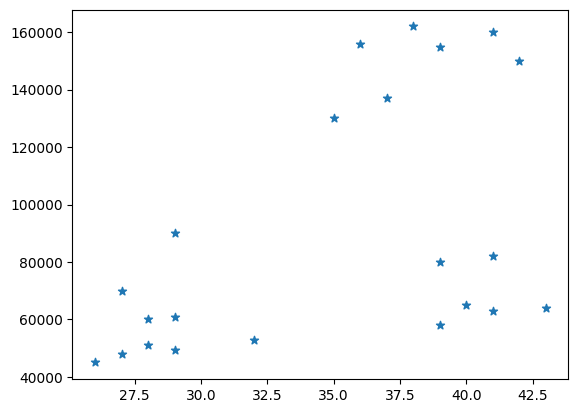

In [4]:
  plt.scatter(df['Age'],df['Income($)'], marker = '*')

By visualising the data we can easily identify for the dataset the number of clusters(K)

# Prepare the dataset for unsupervised machine learning

In [8]:
X = df.drop('Name', axis = 1)

Create model using KMeans algorithm

In [5]:
from sklearn.cluster import KMeans

In [7]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

#Train the model

In [9]:
y_predicted = model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

Here the KMean model has assigned labels to data points such that 3 clusters are created



Combining the y_predicted with orignal df

In [11]:
df['cluster'] = y_predicted

In [12]:
df.head(10)

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [15]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

In [16]:
df0

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
19,Alia,39,80000,0
20,Sid,41,82000,0


In [17]:
df1

,Name,Age,Income($),cluster
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1
10,Donald,37,137000,1


In [18]:
df2

,Name,Age,Income($),cluster
2,Mohan,29,61000,2
3,Ismail,28,60000,2
11,Tom,26,45000,2
12,Arnold,27,48000,2
13,Jared,28,51000,2
14,Stark,29,49500,2
15,Ranbir,32,53000,2
16,Dipika,40,65000,2
17,Priyanka,41,63000,2
18,Nick,43,64000,2


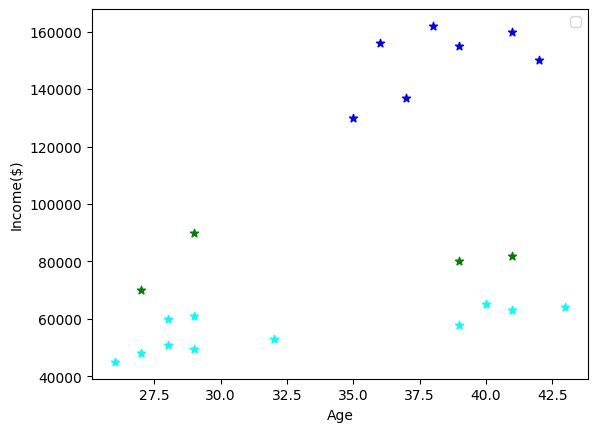

In [23]:
plt.scatter(df0['Age'],df0['Income($)'], marker = '*', color = 'green')
plt.scatter(df1['Age'],df1['Income($)'], marker = '*', color = 'blue')
plt.scatter(df2['Age'],df2['Income($)'], marker ='*', color = 'cyan')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

The red cluster looks fine but the cyan an green are not ok. this problem happened since our dataset is not scaled


On the Y-axis the scale is in thousands while on X-axis the scale is narrow comparitively.


To resolve this scaling issue we will use MinMaxScaler. It will scale the features in the dataset in the range of 0 to 1

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [29]:
X = scaler.fit_transform(X)

In [48]:
X

array([[0.05882353, 0.21367521],
       [0.17647059, 0.38461538],
       [0.17647059, 0.13675214],
       [0.11764706, 0.12820513],
       [0.94117647, 0.8974359 ],
       [0.76470588, 0.94017094],
       [0.88235294, 0.98290598],
       [0.70588235, 1.        ],
       [0.58823529, 0.94871795],
       [0.52941176, 0.72649573],
       [0.64705882, 0.78632479],
       [0.        , 0.        ],
       [0.05882353, 0.02564103],
       [0.11764706, 0.05128205],
       [0.17647059, 0.03846154],
       [0.35294118, 0.06837607],
       [0.82352941, 0.17094017],
       [0.88235294, 0.15384615],
       [1.        , 0.16239316],
       [0.76470588, 0.2991453 ],
       [0.88235294, 0.31623932],
       [0.76470588, 0.11111111]])

In [51]:
df_new = pd.DataFrame(data=X, columns=['Age','Income($)'])

In [65]:
df_new

,Age,Income($),cluster_scaled
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


#Apply KMeans algorithm on the scaled dataset

In [53]:
y_predict_scaled = model.fit_predict(df_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
y_predict_scaled

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [55]:
df_new['cluster_scaled'] = y_predict_scaled

In [56]:
df_new

,Age,Income($),cluster_scaled
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


In [57]:
df0_new = df_new[df_new['cluster_scaled']==0]
df1_new = df_new[df_new['cluster_scaled']==1]
df2_new = df_new[df_new['cluster_scaled']==2]

In [58]:
df0_new

,Age,Income($),cluster_scaled
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0
10,0.647059,0.786325,0


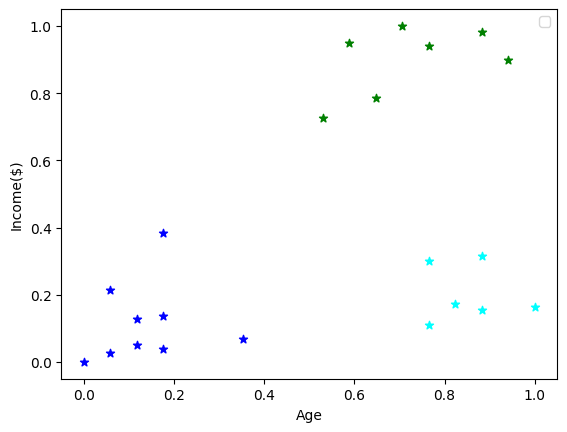

In [59]:
plt.scatter(df0_new['Age'],df0_new['Income($)'], marker = '*', color = 'green')
plt.scatter(df1_new['Age'],df1_new['Income($)'], marker = '*', color = 'blue')
plt.scatter(df2_new['Age'],df2_new['Income($)'], marker ='*', color = 'cyan')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

Position of Centroids can be identified by model.cluster_centers_

In [60]:
model.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

Plot cluster centrods on the scatter plot

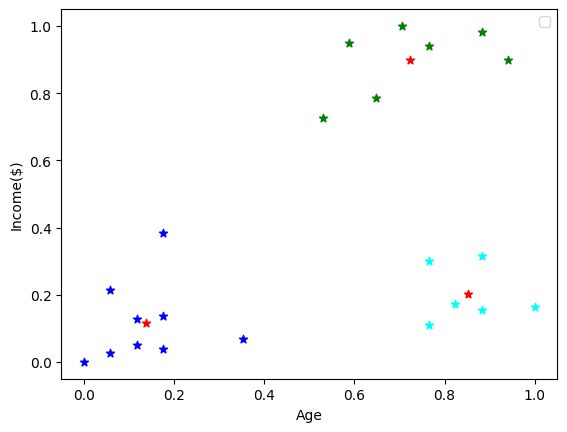

In [62]:
plt.scatter(df0_new['Age'],df0_new['Income($)'], marker = '*', color = 'green')
plt.scatter(df1_new['Age'],df1_new['Income($)'], marker = '*', color = 'blue')
plt.scatter(df2_new['Age'],df2_new['Income($)'], marker ='*', color = 'cyan')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], marker ='*', color = 'red')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

Lets perform Elbow plot method to find the optimum value of clusters K. We have to plot SSE Vs K

Maximum value of K can be total number of samples in the dataset

In [63]:
len(df_new)

22

In [64]:
k_rng = range(1, len(df_new))
sse = []

In [67]:
df_new

,Age,Income($),cluster_scaled
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


In [68]:
for k in k_rng:
  k_model = KMeans(n_clusters=k)
  k_model.fit(df_new[['Age','Income($)']])
  sse.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [69]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.368773407644059,
 0.27687406216004695,
 0.2187801089333045,
 0.1685851223602976,
 0.13265419827245162,
 0.10188787724979426,
 0.08467306738090172,
 0.06367938021444068,
 0.054880236010644456,
 0.038101510924463636,
 0.030426552928992823,
 0.02336003499387405,
 0.01641649105272562,
 0.011033819491365383,
 0.00751395748512241,
 0.0054551225809321684,
 0.003578916064498534,
 0.0017666294837796928]

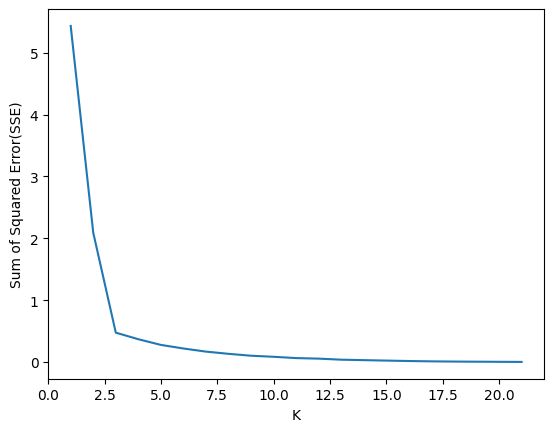

In [71]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error(SSE)')
plt.plot(k_rng,sse)